# Captioning on ADCD enviorments of Calvin

In [2]:
import numpy as np
import cv2
import config as CFG
import matplotlib.pyplot as plt
from PIL import Image
import yaml
from utils.visualize import visualize, showImages

Enviorment:  calvin_scene_B
Caption:  grasp the door handle, then slide the door to the left


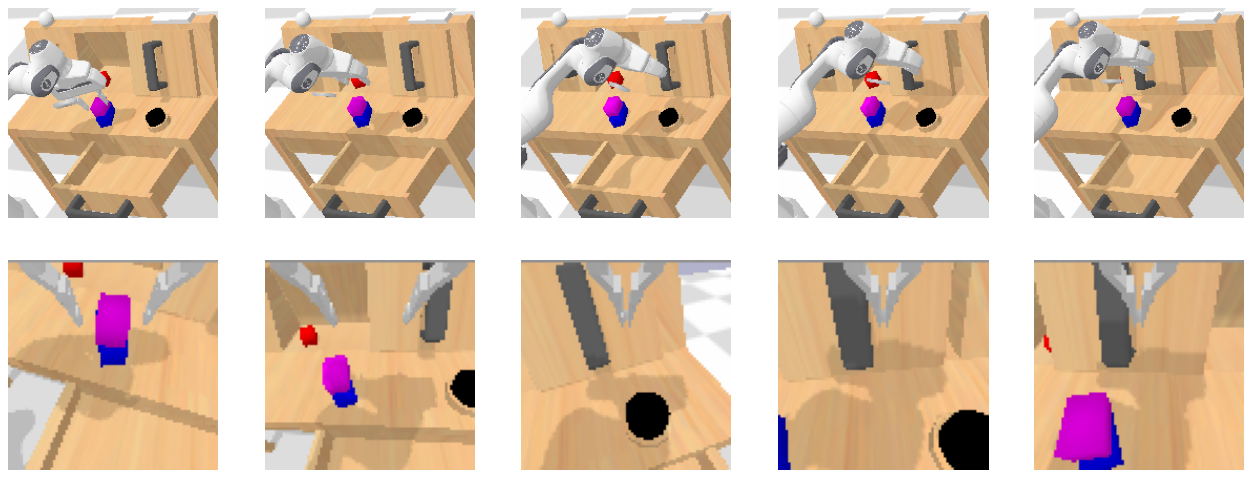

Caption count for enviornment: calvin_scene_B  :  13  


Enviorment:  calvin_scene_C
Caption:  grasp the door handle, then slide the door to the left


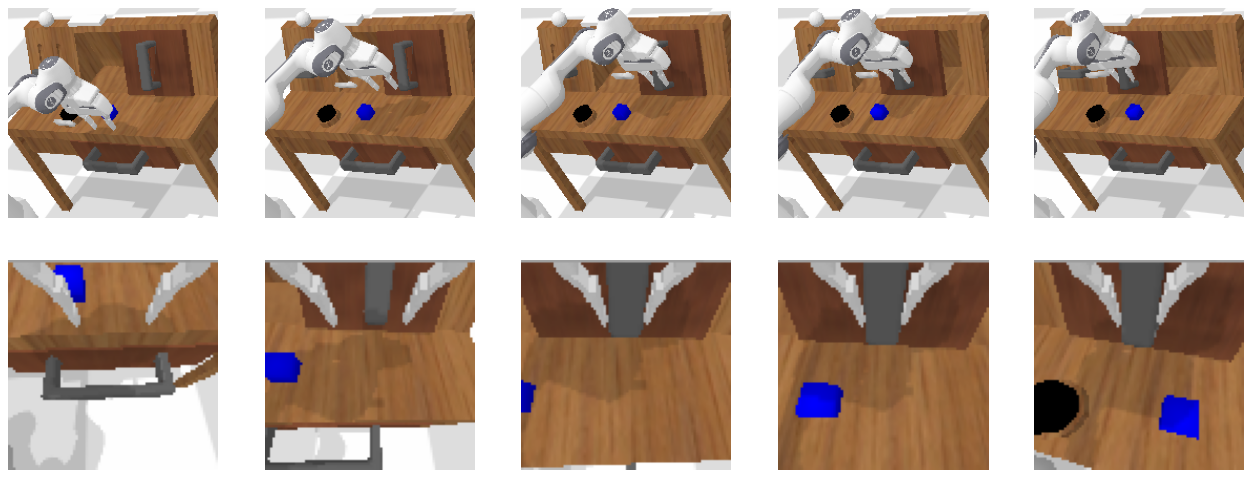

Caption count for enviornment: calvin_scene_C  :  15  


Enviorment:  calvin_scene_A
Caption:  grasp the door handle, then slide the door to the left


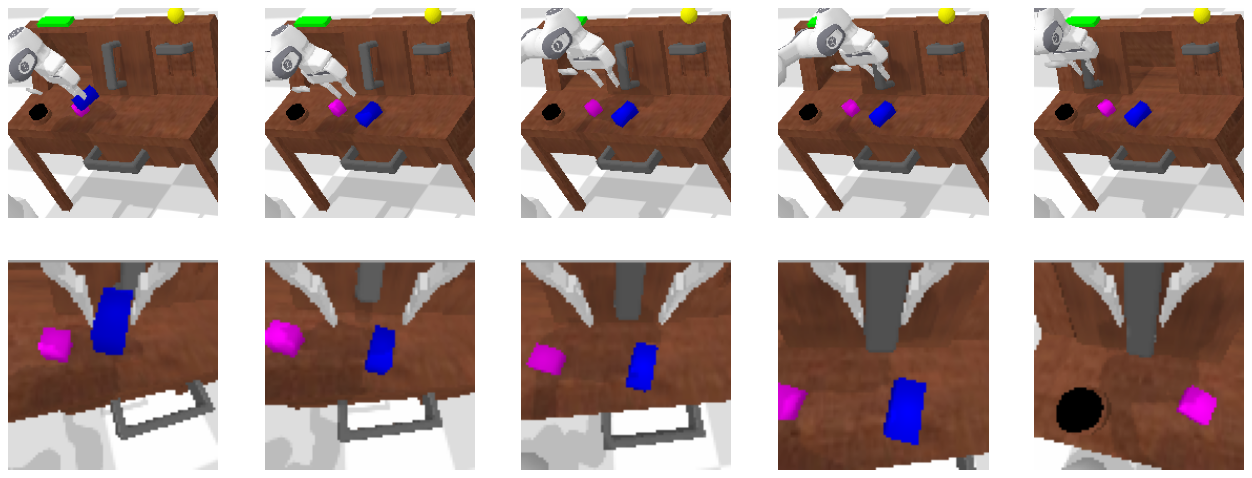

Caption count for enviornment: calvin_scene_A  :  9  


Enviorment:  calvin_scene_D_validation
Caption:  grasp the door handle, then slide the door to the left


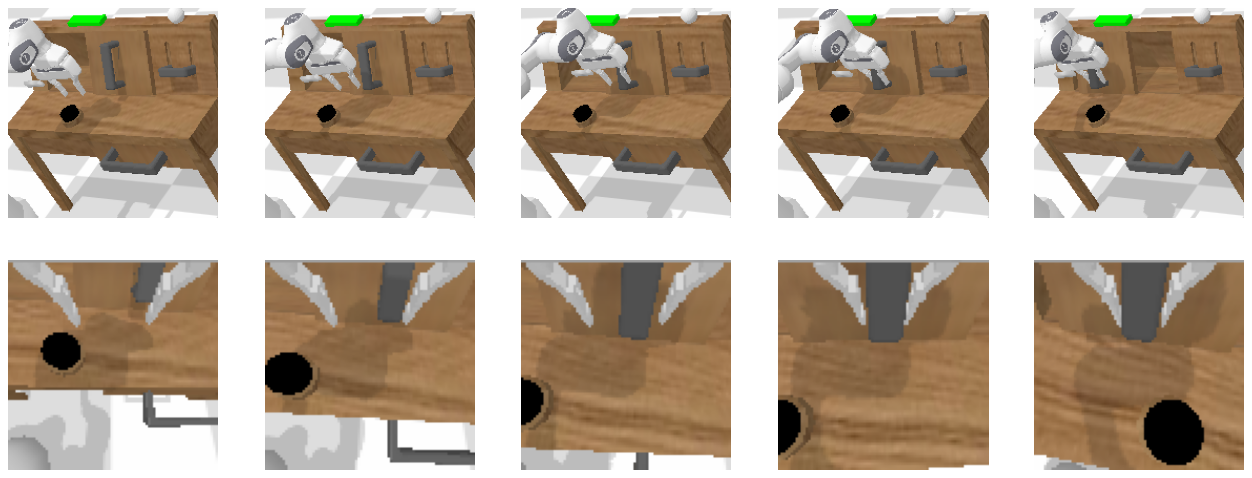

Caption count for enviornment: calvin_scene_D_validation  :  3  




In [4]:

def show_ann_for_env(ann, env, index, path):
        print('Enviorment: ', env)
        print('Caption: ', ann)
        counter = 0
        first = True
        annotations = np.load('{}/lang_annotations/auto_lang_ann.npy'.format(path), allow_pickle=True).item()
        annotations = list(zip(annotations["info"]["indx"], annotations["language"]["ann"]))
        for annotation in annotations:
                if annotation[1] != ann:
                        continue
                if not (index[0] <= annotation[0][0] and annotation[0][1] <= index[1]):
                        continue
                if first:
                        showImages(annotation[0][0], path)
                       # showImages(annotation[0][0], path, range=[0, 8, 16, 24, 32, 40, 48, 56, 64])
                first = False
                counter += 1
        print('Caption count for enviornment:', env, ' : ', counter, ' \n\n')

path = CFG.datapath_training_abcd
scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
for env, index in scene_info.items():
        target_ann = "grasp the door handle, then slide the door to the left"
        show_ann_for_env(target_ann, env, index, path)

path = CFG.datapath_val_abcd
# scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
# for env, index in scene_info.items():
target_ann = "grasp the door handle, then slide the door to the left"
show_ann_for_env(target_ann, "calvin_scene_D_validation", (0, 10000000), path)



## Get test images for Grounded Dino

[0, 598909]


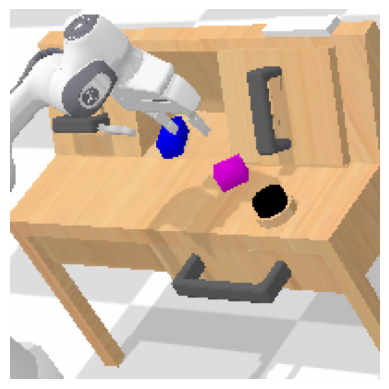

[598910, 1191338]


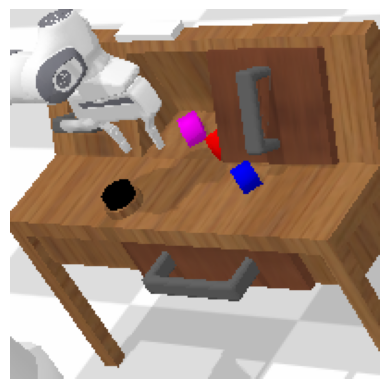

[1191339, 1795044]


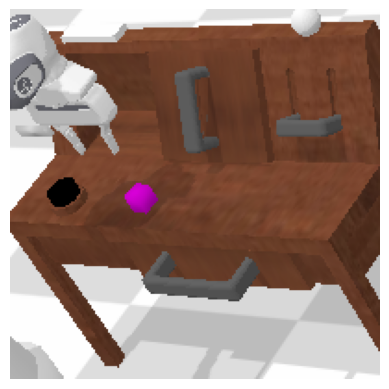

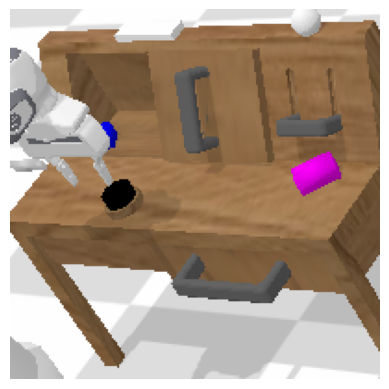

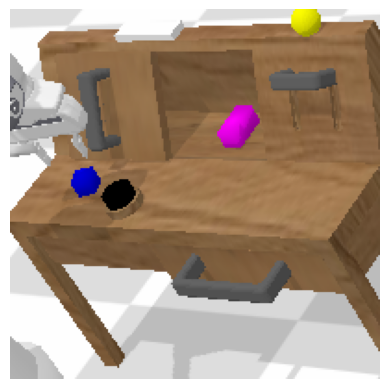

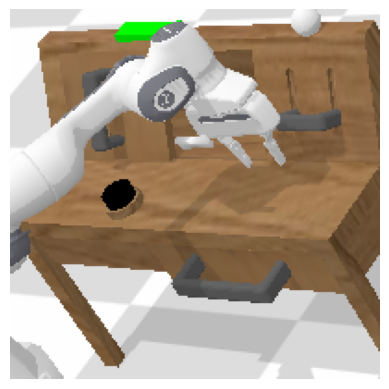

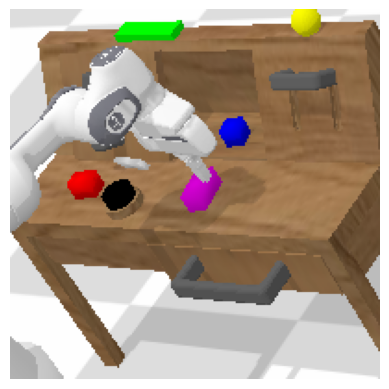

In [4]:

def show_img(index, env, path):
        frame = np.load(f"{path}/episode_{index:07d}.npz", allow_pickle=True)
        img = frame["rgb_static"]
        plt.imshow(img)
        plt.axis('off')
        plt.savefig(f"scene_image_examples/{env}.png", bbox_inches='tight')
        plt.show()

path = CFG.datapath_training_abcd
scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
for env, index in scene_info.items():
        print(index)
        show_img(index[0], env, CFG.datapath_training_abcd)
        
path = CFG.datapath_val_abcd
show_img(0, 'calvin_scene_D', path)
show_img(1000, 'calvin_scene_D', path)
show_img(2000, 'calvin_scene_D', path)
show_img(3000, 'calvin_scene_D', path)


Hulc 2 Real World

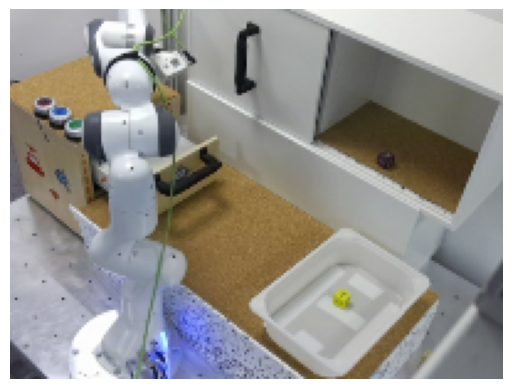

In [24]:

path = '/media/tim/E/hulc_2_real'
frame = np.load("/media/tim/E/episode_0014233.npz", allow_pickle=True)
img = frame["rgb_static"]
plt.imshow(img)
plt.axis('off')
plt.savefig("real_world_hulc_2.png", bbox_inches='tight')
plt.show()


## Videos of enviornments

In [14]:
def get_index_at_caption(ann, index, path):
        annotations = np.load('{}/lang_annotations/auto_lang_ann.npy'.format(path), allow_pickle=True).item()
        annotations = list(zip(annotations["info"]["indx"], annotations["language"]["ann"]))
        for annotation in annotations:
                if annotation[1] != ann:
                        continue
                if not (index[0] <= annotation[0][0] and annotation[0][1] <= index[1]):
                        continue
                return (annotation[0][0], path)
        
def get_indices_at_caption(ann, index, path, num=5):
        annotations = np.load('{}/lang_annotations/auto_lang_ann.npy'.format(path), allow_pickle=True).item()
        annotations = list(zip(annotations["info"]["indx"], annotations["language"]["ann"]))
        counter = 0
        result_arr = []
        for annotation in annotations:
                if annotation[1] != ann:
                        continue
                if not (index[0] <= annotation[0][0] and annotation[0][1] <= index[1]):
                        continue
                result_arr.append((annotation[0][0], path))
                counter += 1
                if counter >= num: 
                        return result_arr
        return result_arr

def create_video(indices, name):
        fourcc = cv2.VideoWriter_fourcc(*'XVID')    
        out = cv2.VideoWriter(f'videos/{name}.avi', fourcc, 20.0, (1600,800))    
        for i in range(0,64):
                plt.figure(figsize=(2, 1), dpi=800)
                plot_index = 1
                for d in ["rgb_static", "rgb_gripper"]:
                        for index in indices:
                                frame = np.load(f"{index[1]}/episode_{index[0]+i:07d}.npz", allow_pickle=True)
                                img = frame[d]
                                plt.subplot(2, 4, plot_index)
                                plt.axis('off')
                                plt.imshow(img)
                                plot_index += 1

               # plt.savefig('videos/temp_image.png')     
               # img = cv2.imread('videos/temp_image.png') 
                fig = plt.gcf()
                fig.canvas.draw()
                img = np.array(fig.canvas.renderer.buffer_rgba())
                img = cv2.cvtColor(img[:, :, :3], cv2.COLOR_RGB2BGR)
               # print(img.shape)
                out.write(img)
                plt.close()
        out.release()

In [51]:
target_anns = [('move_slider_left', "grasp the door handle, then slide the door to the left"),
               ("rotate_red_block_right", 'grasp the red block, then rotate it right'),
               ("push_pink_block_right", 'go push the pink block to the right'),
               ("close_drawer", 'close the drawer'),
               ("place_in_slider", 'place the block in the sliding cabinet'),
               ("turn_on_lightbulb", 'turn on the light bulb'),
               ("turn_off_led", 'turn off the led lamp')]

for ann in target_anns:
        path = CFG.datapath_training_abcd
        scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
        indices = []
        for env, index in scene_info.items():
                index = get_index_at_caption(ann[1], index, path)
                indices.append(index)
        path = CFG.datapath_val_abcd
        index = get_index_at_caption(ann[1], (0, 10000000), path)
        indices.append(index)
        print(indices)
        create_video(indices, ann[0])


# path = CFG.datapath_val_abcd
# scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
# for env, index in scene_info.items():
# target_ann = "grasp the door handle, then slide the door to the left"
# show_ann_for_env(target_ann, "calvin_scene_D_validation", (0, 10000000), path)


[(90670, '/media/tim/E/task_ABC_D/training'), (695095, '/media/tim/E/task_ABC_D/training'), (1342758, '/media/tim/E/task_ABC_D/training'), (1872, '/media/tim/E/task_ABC_D/validation')]
[(94207, '/media/tim/E/task_ABC_D/training'), (637840, '/media/tim/E/task_ABC_D/training'), (1432107, '/media/tim/E/task_ABC_D/training'), (13018, '/media/tim/E/task_ABC_D/validation')]
[(10459, '/media/tim/E/task_ABC_D/training'), (1051116, '/media/tim/E/task_ABC_D/training'), (1269338, '/media/tim/E/task_ABC_D/training'), (34355, '/media/tim/E/task_ABC_D/validation')]
[(257858, '/media/tim/E/task_ABC_D/training'), (806230, '/media/tim/E/task_ABC_D/training'), (1196242, '/media/tim/E/task_ABC_D/training'), (1717, '/media/tim/E/task_ABC_D/validation')]
[(213579, '/media/tim/E/task_ABC_D/training'), (1114422, '/media/tim/E/task_ABC_D/training'), (1729456, '/media/tim/E/task_ABC_D/training'), (2200, '/media/tim/E/task_ABC_D/validation')]
[(545129, '/media/tim/E/task_ABC_D/training'), (915622, '/media/tim/E

## start and end panels per task
code to get better formated result in next cell

In [60]:
target_anns = [('move_slider_left', "grasp the door handle, then slide the door to the left"),
               ("rotate_red_block_right", 'grasp the red block, then rotate it right'),
               ("push_pink_block_right", 'go push the pink block to the right'),
               ("close_drawer", 'close the drawer'),
               ("place_in_slider", 'place the block in the sliding cabinet'),
               ("turn_on_lightbulb", 'turn on the light bulb'),
               ("turn_off_led", 'turn off the led lamp')]

def show_first_and_last(ind_arr: [], filename: str, output_dir =  'img_first_last/'):
        image_final_static = np.array([])
        image_final_gripper = np.array([])
        for d in ["rgb_static", "rgb_gripper"]:
                for index in ind_arr:
                        frame = np.load(f"{index[1]}/episode_{index[0]:07d}.npz", allow_pickle=True)
                        img_first = frame[d]
                        image_pil = Image.fromarray(img_first)
                        image_pil = image_pil.resize((200, 200))
                        img_first = np.array(image_pil)
                        frame = np.load(f"{index[1]}/episode_{index[0]+64:07d}.npz", allow_pickle=True)
                        img_last = frame[d]
                        image_pil = Image.fromarray(img_last)
                        image_pil = image_pil.resize((200, 200))
                        img_last = np.array(image_pil)
                        image_combined = np.vstack((img_first, img_last))
                        if d == 'rgb_static':
                                if image_final_static.size == 0:
                                        image_final_static = image_combined
                                else:
                                        image_final_static = np.hstack((image_final_static, image_combined))
                        if d == 'rgb_gripper':
                                if image_final_gripper.size == 0:
                                        image_final_gripper = image_combined
                                else:
                                        image_final_gripper = np.hstack((image_final_gripper, image_combined))          

        image_final = np.vstack((image_final_static, image_final_gripper))
      #  plt.imshow(image_final)
      #  plt.axis('off')
      #  plt.show()
        output_file = f"{output_dir}/{filename}.png"
        plt.imsave(output_file, image_final)


path = CFG.datapath_training_abcd
scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
indices = []

for target_ann in target_anns:
        for env, index in scene_info.items():
                index = get_indices_at_caption(target_ann[1], index, path, 5)
                indices.append((index, env, target_ann[0]))

for env_indices in indices:
        filename = f'{env_indices[1]}_{env_indices[2]}'
        show_first_and_last(env_indices[0], filename)

#path = CFG.datapath_val_abcd
#index = get_index_at_caption(ann[1], (0, 10000000), path)
#indices.append(index)
#print(indices)
#create_video(indices, ann[0])


## start and end panels per task formated

In [149]:

#target_anns = [('move_slider_left', "grasp the door handle, then slide the door to the left", 0),
#               ("rotate_red_block_right", 'grasp the red block, then rotate it right', 0),
#               ("push_pink_block_right", 'go push the pink block to the right', 0),
#               ("close_drawer", 'close the drawer', 0),
#               ("place_in_slider", 'place the block in the sliding cabinet', 0),
#               ("turn_on_lightbulb", 'turn on the light bulb', 0),
#               ("turn_off_led", 'turn off the led lamp', 0)]

ann_yaml = './ann.yaml'
with open(ann_yaml, "r") as file:
    ann_data = yaml.safe_load(file)

for key, anns in ann_data.items():
        for i, ann in enumerate(anns):
                if i < 3:
                        item = (key, ann, i)
                        target_anns.append(item)

print(target_anns)

def show_first_and_last(ind_arr: []):
        for d in ["rgb_static", "rgb_gripper"]:
                image_first_final = np.array([])
                image_last_final = np.array([])

                for index in ind_arr:
                        # print(index)
                        frame = np.load(f"{index[1]}/episode_{index[0]:07d}.npz", allow_pickle=True)
                        img_first = frame[d]
                        image_pil = Image.fromarray(img_first)
                        image_pil = image_pil.resize((200, 200))
                        img_first = np.array(image_pil)

                        frame = np.load(f"{index[1]}/episode_{index[0]+64:07d}.npz", allow_pickle=True)
                        img_last = frame[d]
                        image_pil = Image.fromarray(img_last)
                        image_pil = image_pil.resize((200, 200))
                        img_last = np.array(image_pil)
                        if image_first_final.size == 0:
                                image_first_final = img_first
                        else:
                                image_first_final = np.hstack((image_first_final, img_first))     
                        if image_last_final.size == 0:
                                image_last_final = img_last
                        else:
                                image_last_final = np.hstack((image_last_final, img_last))  
                if d == 'rgb_static':
                        image_first_final_temp: np.array([]) = image_first_final
                        image_last_final_temp: np.array([]) = image_last_final
                else: 
                        image_first_final = np.vstack((image_first_final_temp, image_first_final))
                        image_last_final = np.vstack((image_last_final_temp, image_last_final))
        return (image_first_final, image_last_final)


path = CFG.datapath_training_abcd
scene_info = np.load('{}/scene_info.npy'.format(path), allow_pickle=True).tolist()
indices = []

for target_ann in target_anns:
        for env, index in scene_info.items():
                index = get_indices_at_caption(target_ann[1], index, path, 1)
                indices.append((index, env, target_ann[0], target_ann[2]))
                if env == 'calvin_scene_A':
                        index = get_indices_at_caption(target_ann[1], [0, 2000000], CFG.datapath_val_abcd, 1)
                        indices.append((index, 'calvin_scene_D', target_ann[0], target_ann[2]))                       

#print(indices)

image_first_final = np.array([])
image_last_final = np.array([])

output_dir =  'img_first_last_large/'
for index in indices:
        image_final = show_first_and_last(index[0])

        if image_final[0].size != 0: 
                if image_first_final.size == 0:
                        image_first_final = image_final[0]
                else: 
                        image_first_final = np.hstack(( image_first_final, image_final[0]))

        if image_final[1].size != 0: 
                if image_last_final.size == 0:
                        image_last_final = image_final[1]
                else:
                        image_last_final = np.hstack(( image_last_final, image_final[1]))
        
       
        if(index[1] == 'calvin_scene_D'):
           #     plt.imshow(image_last_final)
           #     plt.axis('off')
           #     plt.show()     

                filename = f'{output_dir}/{index[2]}_first_{index[3]}.png'
                output_file = f"{filename}"
                plt.imsave(output_file, image_first_final)            
                
                filename = f'{output_dir}/{index[2]}_last_{index[3]}.png'
                output_file = f"{filename}"
                plt.imsave(output_file, image_last_final)  

                image_first_final = np.array([])
                image_last_final = np.array([])

[('rotate_red_block_right', 'grasp the red block, then rotate it right', 0), ('rotate_red_block_right', 'grasp the red block, then turn it right', 1), ('rotate_red_block_right', 'grasp the red block and rotate it right', 2), ('rotate_red_block_left', 'grasp the red block, then rotate it left', 0), ('rotate_red_block_left', 'grasp the red block, then turn it left', 1), ('rotate_red_block_left', 'grasp the red block and rotate it left', 2), ('rotate_blue_block_right', 'grasp the blue block, then rotate it right', 0), ('rotate_blue_block_right', 'grasp the blue block, then turn it right', 1), ('rotate_blue_block_right', 'grasp the blue block and rotate it right', 2), ('rotate_blue_block_left', 'grasp the blue block, then rotate it left', 0), ('rotate_blue_block_left', 'grasp the blue block, then turn it left', 1), ('rotate_blue_block_left', 'grasp the blue block and rotate it left', 2), ('rotate_pink_block_right', 'grasp the pink block, then rotate it right', 0), ('rotate_pink_block_right

# Captioning

dataloader

In [1]:
from datasets.datasetABC import ABCDataset
from transformers import GPT2Tokenizer
from torch.utils.data import DataLoader, Dataset
import config as  CFG

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
datapath_training_parsed = CFG.datapath_training_abcd_parsed
datapath_val_parsed = CFG.datapath_val_abcd_parsed
caption_path_training = f'{CFG.datapath_training_abcd}/lang_annotations/auto_lang_ann.npy'
caption_path_val = f'{CFG.datapath_training_abcd}/lang_annotations/auto_lang_ann.npy'
env_info_path = f'{CFG.datapath_training_abcd}/scene_info.npy'


train_dataset = ABCDataset(datapath_training_parsed, caption_path_training, env_info_path, tokenizer, CFG.max_seq_length)
val_dataset  = ABCDataset(datapath_val_parsed, caption_path_val, env_info_path, tokenizer, CFG.max_seq_length)

train_dataloader = DataLoader(train_dataset, batch_size=CFG.batch_size, shuffle=True, num_workers=CFG.num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=CFG.batch_size, shuffle=False, num_workers=CFG.num_workers)

/media/tim/E/hulc_captioning/captioning/datasets/datasetABC.py:88: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if start_episodes[env] is 0:
/home/tim/anaconda3/envs/cap-env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
for idx, batch in enumerate(train_dataloader):
    print("gpt_tokens: ", batch.gpt_tokens.shape)
    print("gpt_mask: ", batch.gpt_mask.shape)
    print(batch.instruction[0])
    print(list(zip(batch.caption_index[0].tolist(), batch.caption_index[1].tolist()))[0])
    print("actions A: ", batch.actions['A'].shape)
    print("actions B: ", batch.actions['B'].shape)
    print("actions C: ", batch.actions['C'].shape)
    print("state A: ", batch.state['A'].shape)
    print("state B: ", batch.state['B'].shape)
    print("state C: ", batch.state['C'].shape)
    print("observations A: ", batch.observations['A'].shape)
    print("observations B: ", batch.observations['B'].shape)
    print("observations C: ", batch.observations['C'].shape)
    print("batch at index done: ", idx)
    break


gpt_tokens:  torch.Size([16, 16])
gpt_mask:  torch.Size([16, 16])
grasp the red block on the table, then lift it up
(1764992, 1765029)
actions:  {'A': tensor([[[ 0.1582, -0.0722,  0.5211,  ..., -0.1171,  1.6744,  1.0000],
         [ 0.1667, -0.0721,  0.5196,  ..., -0.1162,  1.6675,  1.0000],
         [ 0.1743, -0.0721,  0.5177,  ..., -0.1148,  1.6602,  1.0000],
         ...,
         [ 0.1238, -0.0689,  0.5579,  ..., -0.1412,  1.5578,  1.0000],
         [ 0.1306, -0.0714,  0.5543,  ..., -0.1324,  1.5538,  1.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.2972,  0.0346,  0.5900,  ..., -0.2453,  1.4795,  1.0000],
         [ 0.2960,  0.0317,  0.5934,  ..., -0.2452,  1.4866,  1.0000],
         [ 0.2945,  0.0274,  0.5959,  ..., -0.2402,  1.4972,  1.0000],
         ...,
         [ 0.0880, -0.0765,  0.4661,  ..., -0.0277,  1.5638, -1.0000],
         [ 0.0813, -0.0773,  0.4660,  ..., -0.0277,  1.5607, -1.0000],
         [ 0.0000,  0.0000,  0.0000,  